### 01. 패키지 불러오기

In [54]:
import pandas as pd                         #데이터구조의 전반적인 처리하는 패키지
import sklearn                              
from sklearn.feature_extraction.text import CountVectorizer   #특징(단어)가 몇번 들어있는지
from wordcloud import WordCloud, STOPWORDS  #STOPWORDS 불용어처리
import matplotlib.pyplot as plt            #matplotlib.pyplot 그림을 그려주는 기본 패키지
import numpy as np                          #numpy 연산처리를 array로 하기 위한 패키지

### 02. 데이터불러오기 및 DTM자료 만들기

In [10]:
data=pd.read_csv('wos_ai_.csv',encoding='utf-8').ABSTRACT   #ABSTRACT열만 불러오기

In [14]:
cv = CountVectorizer(max_features=100,stop_words='english') #불용어처리를 영어로함.

In [15]:
cv

CountVectorizer(max_features=100, stop_words='english')

In [17]:
dtm= cv.fit_transform(data)

In [18]:
dtm

<119x100 sparse matrix of type '<class 'numpy.int64'>'
	with 2297 stored elements in Compressed Sparse Row format>

### 03. TF 만들기

In [20]:
words = cv.get_feature_names()

In [21]:
words

['2017',
 'able',
 'accuracy',
 'ai',
 'algorithm',
 'algorithms',
 'analysis',
 'application',
 'applications',
 'applied',
 'approach',
 'approaches',
 'artificial',
 'based',
 'battery',
 'better',
 'complex',
 'computational',
 'computing',
 'control',
 'data',
 'decision',
 'deep',
 'design',
 'developed',
 'development',
 'diagnosis',
 'different',
 'elsevier',
 'energy',
 'experimental',
 'features',
 'field',
 'forecasting',
 'framework',
 'future',
 'fuzzy',
 'high',
 'human',
 'hybrid',
 'important',
 'improve',
 'including',
 'information',
 'intelligence',
 'intelligent',
 'knowledge',
 'learning',
 'linear',
 'machine',
 'main',
 'making',
 'method',
 'methods',
 'mining',
 'model',
 'models',
 'network',
 'networks',
 'neural',
 'new',
 'non',
 'novel',
 'number',
 'optimization',
 'paper',
 'parameters',
 'performance',
 'potential',
 'power',
 'prediction',
 'problem',
 'problems',
 'process',
 'proposed',
 'provide',
 'real',
 'recent',
 'research',
 'results',
 'revie

In [22]:
count_mat = dtm.sum(axis=0)

In [25]:
count_mat

matrix([[ 20,  22,  44,  34,  61,  31,  38,  18,  29,  22,  45,  26, 111,
         111,  21,  21,  21,  20,  26,  33, 128,  46,  26,  39,  24,  27,
          19,  50,  20,  24,  24,  41,  19,  34,  26,  19,  33,  38,  26,
          18,  26,  18,  20,  24, 100,  29,  29,  79,  21,  52,  21,  23,
          67,  42,  25, 105,  48,  64,  29,  59,  55,  21,  19,  22,  34,
          69,  27,  54,  20,  47,  34,  40,  29,  45, 104,  29,  26,  20,
          40,  70,  24,  21,  18,  20,  23,  26,  44,  24,  59,  61,  19,
          21,  46,  19,  53,  45,  59,  20,  30,  27]], dtype=int64)

In [27]:
count = np.squeeze(np.asarray(count_mat))

In [29]:
count

array([ 20,  22,  44,  34,  61,  31,  38,  18,  29,  22,  45,  26, 111,
       111,  21,  21,  21,  20,  26,  33, 128,  46,  26,  39,  24,  27,
        19,  50,  20,  24,  24,  41,  19,  34,  26,  19,  33,  38,  26,
        18,  26,  18,  20,  24, 100,  29,  29,  79,  21,  52,  21,  23,
        67,  42,  25, 105,  48,  64,  29,  59,  55,  21,  19,  22,  34,
        69,  27,  54,  20,  47,  34,  40,  29,  45, 104,  29,  26,  20,
        40,  70,  24,  21,  18,  20,  23,  26,  44,  24,  59,  61,  19,
        21,  46,  19,  53,  45,  59,  20,  30,  27], dtype=int64)

In [32]:
word_list=list(zip(words,count))

In [34]:
word_list

[('2017', 20),
 ('able', 22),
 ('accuracy', 44),
 ('ai', 34),
 ('algorithm', 61),
 ('algorithms', 31),
 ('analysis', 38),
 ('application', 18),
 ('applications', 29),
 ('applied', 22),
 ('approach', 45),
 ('approaches', 26),
 ('artificial', 111),
 ('based', 111),
 ('battery', 21),
 ('better', 21),
 ('complex', 21),
 ('computational', 20),
 ('computing', 26),
 ('control', 33),
 ('data', 128),
 ('decision', 46),
 ('deep', 26),
 ('design', 39),
 ('developed', 24),
 ('development', 27),
 ('diagnosis', 19),
 ('different', 50),
 ('elsevier', 20),
 ('energy', 24),
 ('experimental', 24),
 ('features', 41),
 ('field', 19),
 ('forecasting', 34),
 ('framework', 26),
 ('future', 19),
 ('fuzzy', 33),
 ('high', 38),
 ('human', 26),
 ('hybrid', 18),
 ('important', 26),
 ('improve', 18),
 ('including', 20),
 ('information', 24),
 ('intelligence', 100),
 ('intelligent', 29),
 ('knowledge', 29),
 ('learning', 79),
 ('linear', 21),
 ('machine', 52),
 ('main', 21),
 ('making', 23),
 ('method', 67),
 ('met

In [38]:
word_list=sorted(word_list,key=lambda x:x[1],reverse=True)

In [40]:
word_list

[('data', 128),
 ('artificial', 111),
 ('based', 111),
 ('model', 105),
 ('proposed', 104),
 ('intelligence', 100),
 ('learning', 79),
 ('results', 70),
 ('paper', 69),
 ('method', 67),
 ('network', 64),
 ('algorithm', 61),
 ('techniques', 61),
 ('neural', 59),
 ('systems', 59),
 ('using', 59),
 ('new', 55),
 ('performance', 54),
 ('use', 53),
 ('machine', 52),
 ('different', 50),
 ('models', 48),
 ('power', 47),
 ('decision', 46),
 ('time', 46),
 ('approach', 45),
 ('process', 45),
 ('used', 45),
 ('accuracy', 44),
 ('study', 44),
 ('methods', 42),
 ('features', 41),
 ('problem', 40),
 ('research', 40),
 ('design', 39),
 ('analysis', 38),
 ('high', 38),
 ('ai', 34),
 ('forecasting', 34),
 ('optimization', 34),
 ('prediction', 34),
 ('control', 33),
 ('fuzzy', 33),
 ('algorithms', 31),
 ('various', 30),
 ('applications', 29),
 ('intelligent', 29),
 ('knowledge', 29),
 ('networks', 29),
 ('problems', 29),
 ('provide', 29),
 ('development', 27),
 ('parameters', 27),
 ('work', 27),
 ('app

### 04. wordcloud 그리기

In [50]:
stopwords= set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [49]:
wc = WordCloud( background_color='black',stopwords=stopwords,width=800,height=600 )

In [52]:
cloud = wc.generate_from_frequencies(dict(word_list))

In [62]:
plt.figure(figsize=(1,9))

<Figure size 100x900 with 0 Axes>

<Figure size 100x900 with 0 Axes>

(-0.5, 799.5, 599.5, -0.5)

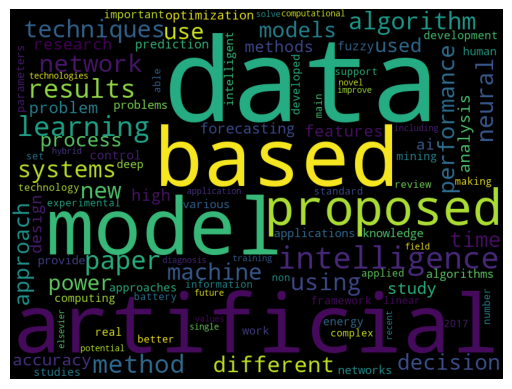

In [63]:
plt.imshow(cloud)
plt.axis('off')

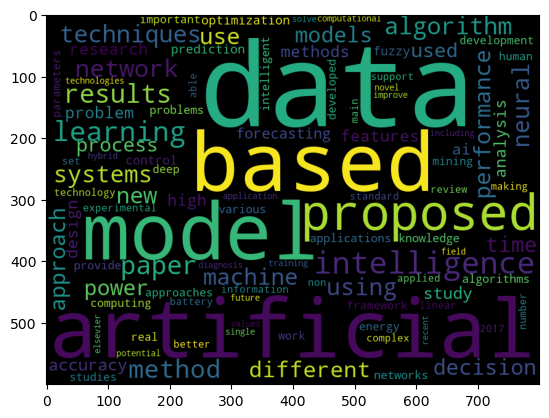

In [59]:
plt.imshow(cloud)